In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# !pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=cb1821f74e7b0d1abc77f1358a4f7ea455f26f6d4a2678ff0780d9d8cd6a2a19
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
# !pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import BorderlineSMOTE, RandomOverSampler, ADASYN, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
df = pd.read_csv('/content/drive/MyDrive/데이터스쿨/실습파일/ML_project/dataset.csv', index_col=0)
exited = {'Existing Customer': 0, 'Attrited Customer':1}
gender = {'M':0, 'F':1}
education = {'Uneducated': 0, 'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate': 4, 'Doctorate':5, 'Unknown':6}
marital = {'Single':0, 'Married': 1, 'Divorced':2, 'Unknown':3}
income = {'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4, 'Unknown':5}
card = {'Blue':0, 'Silver':1 , 'Gold': 2, 'Platinum': 3}
df['Exited'] = df['Exited'].map(exited)
df['Gender'] = df['Gender'].map(gender)
df['Education'] = df['Education'].map(education)
df['Marital'] = df['Marital'].map(marital)
df['Income'] = df['Income'].map(income)
df['Card_type'] = df['Card_type'].map(card)
df.head()

,Exited,Age,Gender,Dependents,Education,Marital,Income,Card_type,Tenure,Product_Cnt,Inactive_Months,Contacts_Cnt,Credit_Limit,Revolv_Bal,Avg_OTB,Avg_Util_Ratio,Trans_Amt,Trans_Cnt,Amt_Chng_Q4_Q1,Cnt_Chng_Q4_Q1
0,0,45,0,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,0.061,1144,42,1.335,1.625
1,0,49,1,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,0.105,1291,33,1.541,3.714
2,0,51,0,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,0.000,1887,20,2.594,2.333
3,0,40,1,4,1,3,0,0,34,3,4,1,3313.0,2517,796.0,0.760,1171,20,1.405,2.333
4,0,40,0,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,0.000,816,28,2.175,2.500


In [4]:
X = df[['Product_Cnt', 'Inactive_Months', 'Contacts_Cnt', 'Revolv_Bal', 'Avg_Util_Ratio', 'Trans_Amt', 'Trans_Cnt', 'Amt_Chng_Q4_Q1','Cnt_Chng_Q4_Q1']]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    seed=0,
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    n_estimators=300,
    subsample=0.7
)
estimators = [('scaler', StandardScaler()), ('clf', model)]

pipe = Pipeline(estimators)

In [5]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print('accuracy: ', accuracy_score(y_test, pred))
print('precision: ', precision_score(y_test, pred))
print('recall: ', recall_score(y_test, pred))
print('f1: ', f1_score(y_test, pred))
print('auc: ', roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

accuracy:  0.9703849950641659
precision:  0.9260450160771704
recall:  0.8861538461538462
f1:  0.9056603773584906
auc:  0.9363161940939718
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.89      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026

[[1678   23]
 [  37  288]]


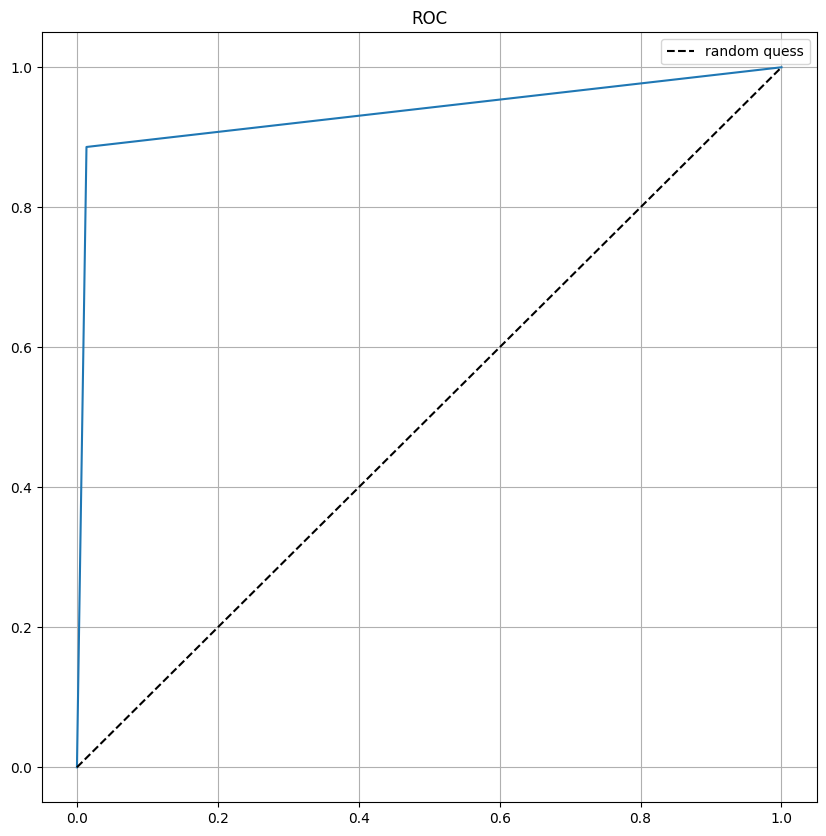

In [6]:
plt.figure(figsize=(10, 10))

ypred = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label='random quess')
plt.title('ROC')
plt.legend()
plt.grid()
plt.show()

### 1. feature_importance

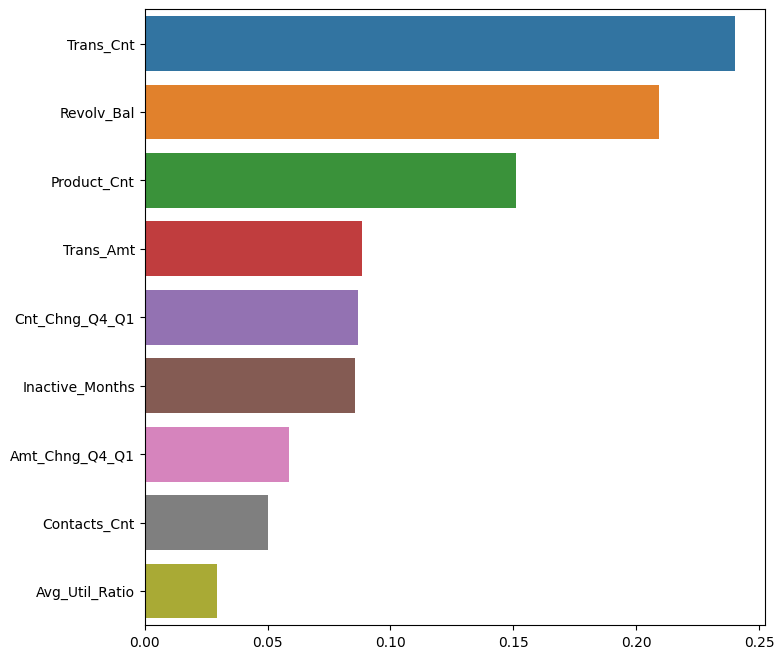

In [8]:
best_cols_values = pipe['clf'].feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(x=best_cols, y=best_cols.index)
plt.show()

### 2. permuation importance

In [6]:
def plot_importance(X, importance, importance_std, x_label, y_label='Importance'):
  temp1 = [X.columns[i] for i in range(len(importance))]
  temp2 = importance
  temp3 = importance_std
  result = sorted(zip(temp1, temp2, temp3), key=lambda x:x[1])
  label = [x[0] for x in result]
  value = [x[1] for x in result]
  value_2 = [x[2] for x in result]
  plt.barh(label, value, height=0.5)
  plt.xlabel(x_label, fontsize=10)
  plt.ylabel(y_label, fontsize=10)

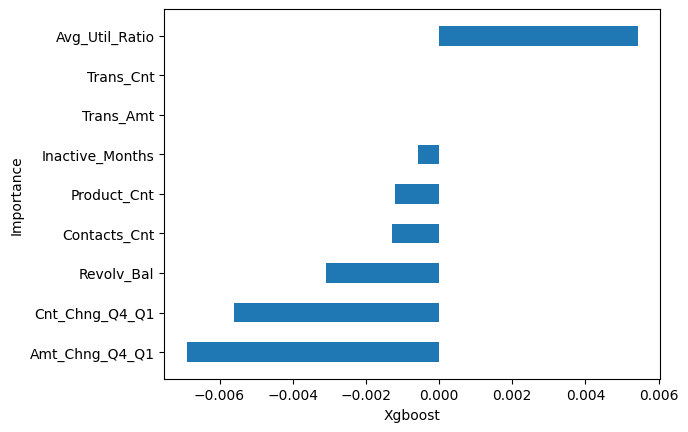

In [7]:
importance = permutation_importance(pipe['clf'], X_test, y_test, n_repeats=30, random_state=13).importances_mean
std = permutation_importance(pipe['clf'], X_test, y_test, n_repeats=30, random_state=13).importances_std
# 시각화
plot_importance(X, importance, std, 'Xgboost')
plt.show()

In [8]:
perm = PermutationImportance(model, scoring = "accuracy", random_state = 13).fit(X_test, y_test)
eli5.show_weights(perm, top = 9, feature_names = X_test.columns.tolist())

Weight,Feature
0.0054 ± 0.0028,Avg_Util_Ratio
0 ± 0.0000,Trans_Cnt
0 ± 0.0000,Trans_Amt
-0.0008 ± 0.0012,Inactive_Months
-0.0013 ± 0.0013,Product_Cnt
-0.0017 ± 0.0038,Contacts_Cnt
-0.0019 ± 0.0015,Revolv_Bal
-0.0049 ± 0.0053,Amt_Chng_Q4_Q1
-0.0071 ± 0.0043,Cnt_Chng_Q4_Q1


In [9]:
perm = PermutationImportance(model, scoring = "f1", random_state = 13).fit(X_test, y_test)
eli5.show_weights(perm, top = 9, feature_names = X_test.columns.tolist())

Weight,Feature
0.0136 ± 0.0115,Amt_Chng_Q4_Q1
0.0030 ± 0.0087,Contacts_Cnt
0.0010 ± 0.0043,Inactive_Months
0.0009 ± 0.0043,Product_Cnt
0 ± 0.0000,Trans_Cnt
0 ± 0.0000,Trans_Amt
-0.0024 ± 0.0081,Avg_Util_Ratio
-0.0074 ± 0.0080,Cnt_Chng_Q4_Q1
-0.0261 ± 0.0063,Revolv_Bal


### 3. shap value

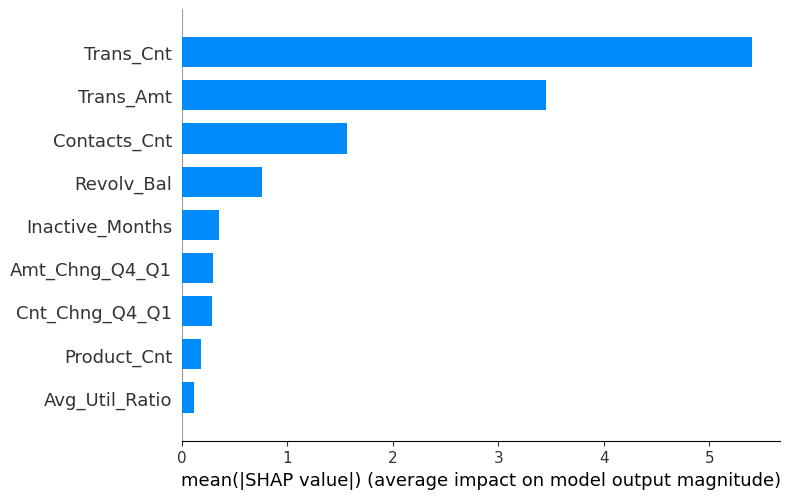

In [12]:
explainer = shap.Explainer(pipe['clf'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')